In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from math import sqrt
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA

In [2]:

#read in the url and scrape ticker data
indx = 'SP500'
source_table_name = 'Data/'+indx+'.csv'
data_table = pd.read_csv(source_table_name)
# data_table = data_table.head(4)
# data_table

In [3]:
# ############################ run this once And save the results to a csv. Taked approx. 22 mins 
# ################### Comment after it has executed once. 
# # tickers = company_list
# tickers = data_table['Symbol'].str.strip()

# closing_prices_list = []
# for ticker in tickers:
#     try:
#         prices = pdr.DataReader(ticker,'yahoo','10/24/2019')
#         # print(prices)
#         prices = prices['Close']
#         prices = pd.DataFrame(prices)
#         # print(prices)
#         prices.columns = [ticker]
#         closing_prices_list.append(prices)
#         # print(closing_prices_list)
#     except:
#         pass
#     # print(closing_prices_list)
#     prices_df = pd.concat(closing_prices_list,axis=1)

# prices_df.sort_index(inplace=True)
# prices_df
# prices_df.to_csv("Data/"+indx+"_Close_prices_df.csv", index=True)

In [4]:
# the data gathered in the above dataframe and saved to csv file is being retrieved here
fromcsv = pd.read_csv("Data/"+indx+"_Close_prices_df.csv")
fromcsv=fromcsv.set_index('Date')
fromcsv

prices_df = fromcsv
prices_df.shape

(505, 503)

In [5]:
prices_df.columns

Index(['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP',
       'AES',
       ...
       'WLTW', 'WYNN', 'XEL', 'XLNX', 'XYL', 'YUM', 'ZBRA', 'ZBH', 'ZION',
       'ZTS'],
      dtype='object', length=503)

In [6]:
per_change = (prices_df.diff().sum())/prices_df.iloc[0]
per_change = per_change.to_frame()
per_change

,0
MMM,0.126259
ABT,0.554449
ABBV,0.415461
ABMD,0.971716
ACN,0.929405
...,...
YUM,0.153649
ZBRA,1.514829
ZBH,0.122699
ZION,0.387497


In [7]:
per_change = per_change.rename(columns={0:'Returns'})
per_change

,Returns
MMM,0.126259
ABT,0.554449
ABBV,0.415461
ABMD,0.971716
ACN,0.929405
...,...
YUM,0.153649
ZBRA,1.514829
ZBH,0.122699
ZION,0.387497


In [8]:
# np.sqrt(((prices_df['AAPL']-prices_df['AAPL'].mean())**2).mean())

In [9]:
vol = prices_df.std()

In [10]:
per_change['Volatility'] = vol
per_change

,Returns,Volatility
MMM,0.126259,18.194670
ABT,0.554449,15.160307
ABBV,0.415461,12.394728
ABMD,0.971716,65.090582
ACN,0.929405,49.649354
...,...,...
YUM,0.153649,15.086160
ZBRA,1.514829,127.645795
ZBH,0.122699,17.811862
ZION,0.387497,10.929388


In [11]:

per_change = per_change.fillna(0)
per_change[per_change['Volatility'].isna()]

,Returns,Volatility


# Clusters with Unscaled Data

In [12]:
distortions = []
inertia = []
k = range(1, 11)
# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(per_change)
    distortions.append(sum(np.min(cdist(per_change, km.cluster_centers_,
                                        'euclidean'), axis=1)) / per_change.shape[0])
    inertia.append(km.inertia_)

C:\Users\vmuty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


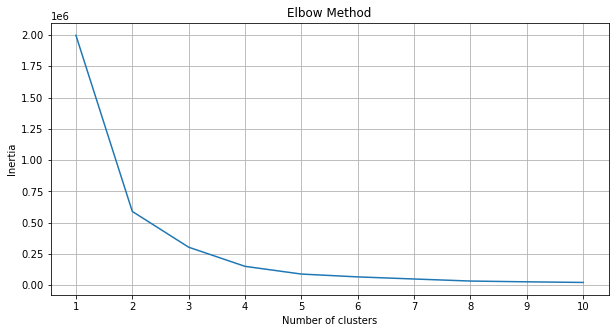

In [13]:
# Create the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
plt.figure(figsize=(10, 5))
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
# plt.plot(df_elbow['k'], distortions, 'bx-')
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.grid(True)
plt.show()

#### Looks like there or 4 or 5 clusters. Let's try scaling the data first

# Clusters with Scaled Data

In [14]:
stock_data_scaled = StandardScaler().fit_transform(per_change)
stock_data_scaled_df = pd.DataFrame(stock_data_scaled)
stock_data_scaled_df.shape
# stock_data_scaled

(503, 2)

In [15]:
distortions = []
inertia = []
k = range(1, 11)
# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(stock_data_scaled)
    distortions.append(sum(np.min(cdist(stock_data_scaled, km.cluster_centers_,
                                        'euclidean'), axis=1)) / stock_data_scaled.shape[0])
    inertia.append(km.inertia_)

C:\Users\vmuty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


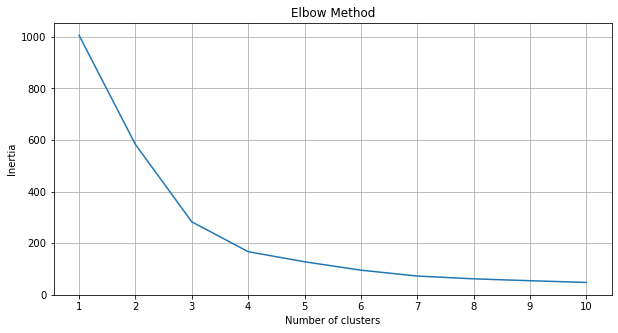

In [16]:
# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
plt.figure(figsize=(10, 5))
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
# plt.plot(df_elbow['k'], distortions, 'bx-')

plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.grid(True)
plt.show()

In [17]:
# Predicting clusters with k=4

# Initialize the k-means model
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(stock_data_scaled)

# Predict clusters
predictions = model.predict(stock_data_scaled)

In [18]:
# Add the predicted cluster column to the dataframe (name it class)
per_change["Cluster"] = model.labels_
per_change["Cluster"].unique()
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]


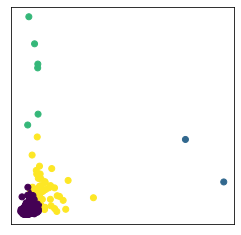

In [19]:
plt.figure(figsize=(4, 4))
plt.scatter(x=per_change['Returns'], y=per_change['Volatility'], c=per_change['Cluster'])

# plt.title('Clusters')
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.savefig("../static/Images/"+indx+"_PCV_clusters.png")
plt.show()

In [20]:
per_change = per_change.sort_values(by='Cluster')
per_change = per_change.reset_index()
per_change = per_change.rename(columns={'index':'Stock'})
per_change

,Stock,Returns,Volatility,Cluster
0,MMM,0.126259,18.194670,0
1,NEM,0.492583,9.041496,0
2,NWL,0.164267,4.830464,0
3,NTAP,0.685663,16.292702,0
4,NDAQ,0.990400,30.552903,0
...,...,...,...,...
498,AZO,0.626809,212.289068,3
499,MSFT,1.205945,46.085666,3
500,CHTR,0.673478,97.925162,3
501,BBWI,3.991725,19.445796,3


In [21]:
file_path = "Data/Analyzed/"+indx+"_Clustered_Stocks.csv"
per_change.to_csv(file_path)